In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

# Question 1

In [2]:
# reading data into a dataframe
df = pd.read_csv('classification.csv')

In [3]:
# analyzing data
df.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [4]:
# getting shape of dataset
df.shape

(297, 3)

In [5]:
# getting positive and negative instances
df_pos = df[df['success'] == 1]
df_neg = df[df['success'] == 0]

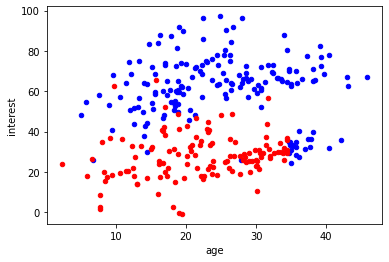

In [6]:
# plotting data
def plot_data():
    ax = df_pos.plot(kind='scatter', x='age', y='interest', color='blue')
    df_neg.plot(kind='scatter', x='age', y='interest', color='red', ax=ax)

def plot_data_3d(ax):
    ax.scatter(df_pos['age'], df_pos['interest'], df_pos['success'], color = 'blue')
    ax.scatter(df_neg['age'], df_neg['interest'], df_neg['success'], color = 'red')

plot_data()

In [7]:
# obtain label and feature matrix

# add bias term
X = df[['age', 'interest']]
X['bias'] = 1

# get numpy arrays
X = X.to_numpy()
Y = df[['success']].to_numpy()

In [8]:
# get misclassified

def misclassified(y, Y):
    return np.sum(np.abs((1*(y > 0.5))-Y))/len(Y)

Misclassified: 0.12457912457912458


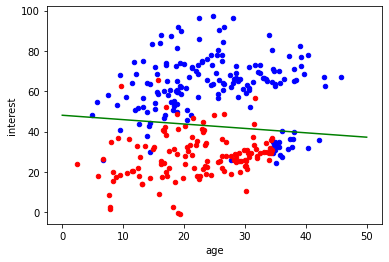

In [9]:
# least squares method

def ls_fit(X, Y):
    # we use normal equation for least squares method
    w = (np.linalg.pinv(X.T @ X)) @ (X.T @ Y)
    return w

def plot_line(w):
    # if f(x) = w1.x1 + w2.x2 + w3
    # f(x) = 0.5 should be the line dividing
    # the dataset into two classes
    
    # age value is less than 50 for
    # every row
    x = np.linspace(0, 50, 1000)
    y = (0.5 - w[2] - w[0] * x) / w[1]
    plt.plot(x, y, 'green')

# obtain weights
w = ls_fit(X, Y)

# plot
plot_data()
plot_line(w)

# misclassified
print(f'Misclassified: {misclassified(X@w, Y)}')

In [10]:
# logistic regression using stochastic gradient descent

step_size = 1e-3
num_iterations = 2000
WATCH_CONVERGENCE = False

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def h(x, w):
    # computes what is passed to sigmoid
    ans = x @ w
    return ans

def lr_fit(X, Y, step_size = 1e-3, num_iterations = 2000, WATCH_CONVERGENCE = False):
    # initializing weights in [-0.1, 0.1]
    w = (np.random.rand(X.shape[1]) - 0.5) / 5
    
    # gradient descent
    for _ in range(num_iterations):
        for i in range(X.shape[0]):
            w = w + step_size * (Y[i] - sigmoid(h(X[i], w))) * X[i]
        
        if (_% 50 == 0 and WATCH_CONVERGENCE):
            print(w)
    
    return w

# obtain weights
w = lr_fit(X, Y, step_size, num_iterations, WATCH_CONVERGENCE)

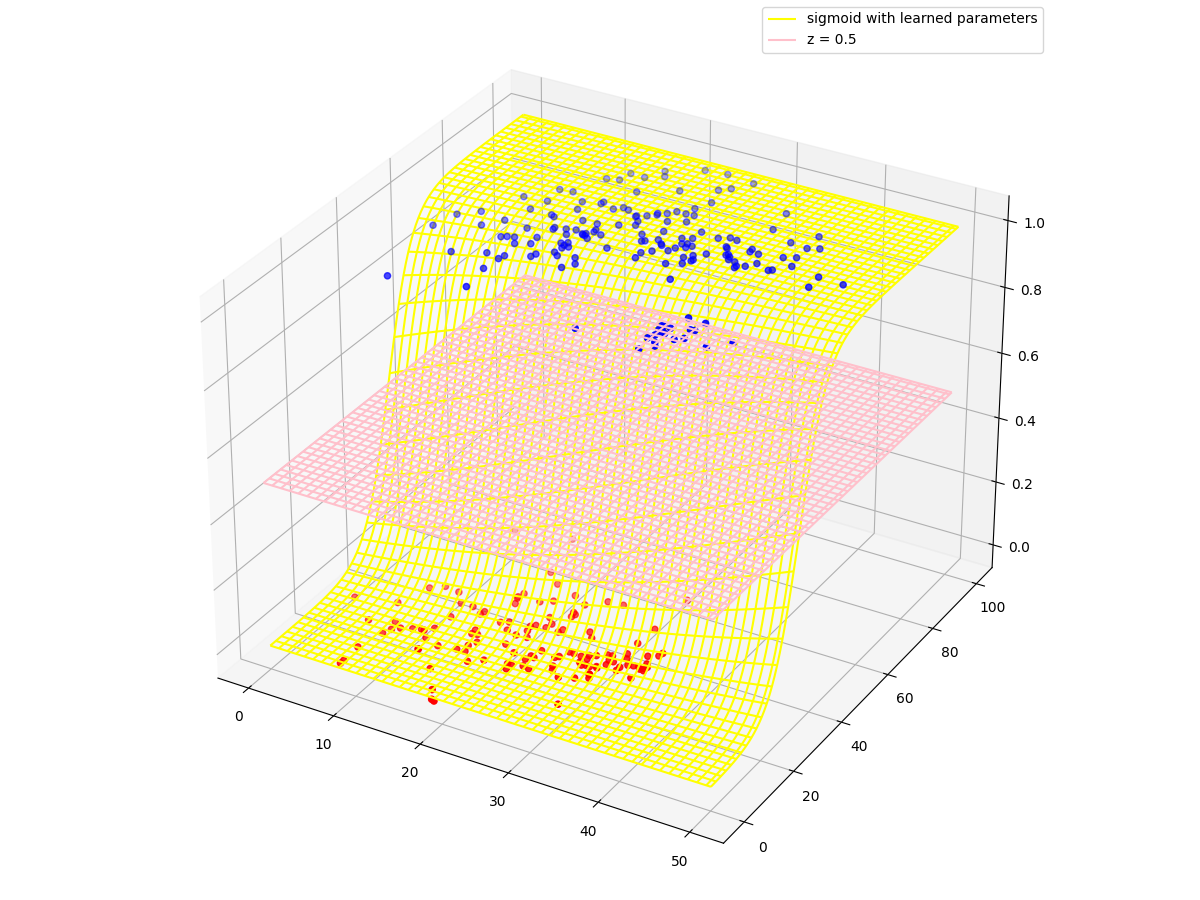

In [11]:
%matplotlib widget

# 3d plot of learnt sigmoid

def sigmoid_from_coordinates(x, y):
    return sigmoid(h(np.array([x, y, 1], dtype=object), w))

def plane(x, y):
    return (x+y)*0 + 0.5

def plot_sigmoid(ax, w):
    x = np.outer(np.linspace(0, 50, 100), np.ones(100))
    y = np.outer(np.linspace(0, 100, 100), np.ones(100)).T
    
    z = sigmoid_from_coordinates(x, y)
    ax.plot_wireframe(x, y, z, color = 'yellow', label = 'sigmoid with learned parameters')
    
    z = plane(x, y)
    ax.plot_wireframe(x, y, z, color = 'pink', label = 'z = 0.5')
    
    ax.legend()

# plot
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
plot_data_3d(ax)
plot_sigmoid(ax, w)

Misclassified: 0.12457912457912458


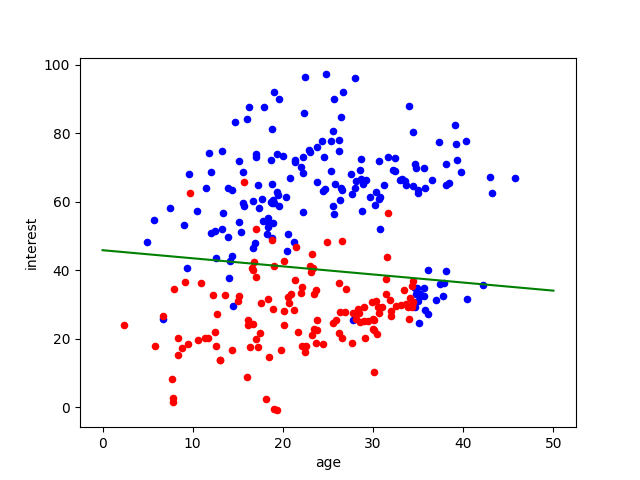

In [12]:
# plotting decision boundary for learnt sigmoid

def plot_sigmoid_boundary(w):
    # if h(x) = w1.x1 + w2.x2 + w3
    # h(x) = 0 should be the line dividing
    # the dataset into two classes
    # because sigmoid(h(x)) = 0.5 only for h(x) = 0
    
    # age value is less than 50 for
    # every row
    x = np.linspace(0, 50, 1000)
    y = (- w[2] - w[0] * x) / w[1]
    plt.plot(x, y, 'green')

plot_data()
plot_sigmoid_boundary(w)

# misclassified
print(f'Misclassified: {misclassified(sigmoid(h(X, w).reshape(len(Y), -1)), Y)}')

In [13]:
# higher dimensions
df_2 = df[['age', 'interest']]

df_2['age^2'] = df_2['age'] ** 2
df_2['interest^2'] = df_2['interest'] ** 2

df_2['age*interest'] = df_2['age'] * df_2['interest']

df_2['bias'] = 1

In [14]:
# normalize to avoid overflows
factors = df_2.max().to_numpy()
df_2_normalized = df_2 / df_2.max()

In [15]:
# design matrix for two dimensions
X_normalized = df_2_normalized.to_numpy()
X = df_2.to_numpy()

In [16]:
# linear regression
w_normalized = lr_fit(X_normalized, Y, 1, 4000, False)

In [17]:
# scale down w to accomodate initial normalization
w = w_normalized / factors

Misclassified: 0.08080808080808081


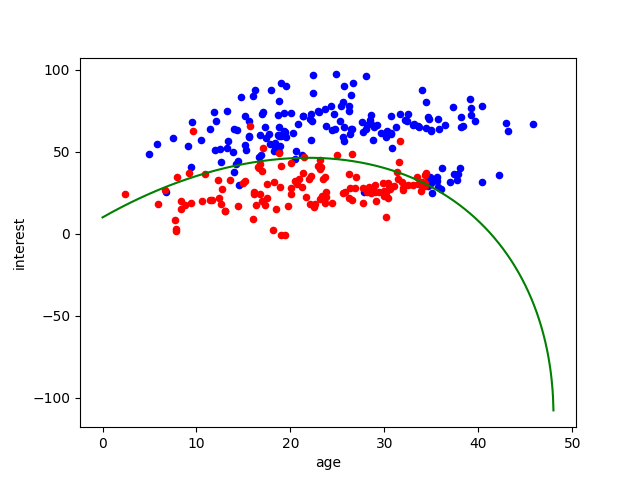

In [18]:
# plotting decision boundary for learnt sigmoid

def plot_sigmoid2_boundary(w):
    # if h(x) = w1.x1 + w2.x2 + w3
    # h(x) = 0 should be the line dividing
    # the dataset into two classes
    # because sigmoid(h(x)) = 0.5 only for h(x) = 0
    
    # age value is less than 48 for
    # every row
    x = np.linspace(0, 48, 1000)
    D = (w[1] + w[4]*x)**2 -4*w[3]*(w[0]*x + w[2]*(x**2) + w[5])
    y1 = (-w[1] - w[4] * x + (D**0.5)) / (2*w[3])
    
    plt.plot(x, y1, 'green')

plot_data()
plot_sigmoid2_boundary(w)

# misclassifications
print(f'Misclassified: {misclassified(sigmoid((X@w).reshape(len(Y), -1)), Y)}')